# Tutorila II

En el turtorial anterior ([Tutorial I]) hemos introducido algunos conceptos básicos sobre el uso de la librería de TensorFlow para la implementación de modelos para realizar procesos de aprendizaje automático (machine learning).
En el [Tutorial I] mediante un ejemplo simple de regresión lineal, hemos cerado un modelo capáz de reconocer dígitos escritos a mano usando el cunjuto de datos [MNIST]. Vimos como  éste modelo lineal simple tenía una precisión en la clasificación de un 91% en la tarea de reconocer los dígitos. Es importnate destacar que el objetivo principal del [Tutorial I] era familiarizarce  con la estilo de programación medieante la implementación de grafos de flujo de datos de TensorFlow.

[Tutorial I]:https://www.apsl.net/blog/2017/12/05/tensor-flow-para-principiantes-i/
[MNIST]:http://yann.lecun.com/exdb/mnist/

En este tutorial implementaremos una Red Neural Convolucional en TensorFlow, y veremos que éste modelo  más complejos es capáz de reconocer los dígitos escrito a mano con una precisión de clasificación de aproximadamente un 99%.  

El objetivo de éste tutorial, es mediante el ejemplo empleado en el [Tutorial I] usar la librería de TensorFlow para crear y entrenar redes neuronales. 

Antes de seguir con éste tutorial, si no se está familiarizado con los conceptos, propiedades y como funcionan las *Redes Neuronales Convolucionales* (Convolutional Neural Netwoks **CNNs**), recomendamos que revisen nuestro artículo [Use of Convolutional Neural Network for Image Classification].

[Use of Convolutional Neural Network for Image Classification]:https://www.apsl.net/blog/2017/11/20/use-convolutional-neural-network-image-classification/


### Redes Neuronales Convolucionales con TensorFlow

Como se explica en [Use of Convolutional Neural Network for Image Classification], las redes Convolutionales funcionan moviendo pequeños filtros a través de la imagen de entrada. Esto significa que los filtros se reutilizan para reconocer patrones en toda la imagen de entrada. La introducción de las capas convolucionales en las redes neuronales permiten que éstas sean mucho más poderosas que las redes neuronales tradicionales. 

En la figura que se presenta a continuación muestra aproximadamente cómo fluyen los datos por la la red neuronal convolucional que se implementa en éste tutorial.


### Diagrama de flujo de datos en la red  (Flowchart)

![F1](imagenes/02_network_flowchart.png)

Vamos a describir un poco lo que representa éste diagrama. Como se observa, la imagen de entrada (un 7 con una resolución de 28x28) se procesa en la primera capa convolucional utilizando los pesos de los filtros (16). Esto da como resultado 16 nuevas imágenes, una para cada filtro en la capa convolucional. Luego las imágenes se procesan de manera tal, que la resolución de éstas se reduce de 28x28 a 14x14 (ver [Use of Convolutional Neural Network for Image Classification] para saber como son éstos procesos).

Estas 16 imágenes más pequeñas se procesan en la segunda capa convolucional. En esta segunda capa necesitamos un filtro para cada uno de estos 16 canales proveniente de la primera capa convolucional, y necesitamos ponderar cada filtro para cada canal de salida de esta capa, es decir 16x16=36, que corresponden al número de canales de salida. Puesto que tenemos 36 canales de salida, tendremos un total de 16x36 = 576 filtros en la segunda capa convolucional. Luego, las imágenes resultantes se procesan de nuevo para reducir la resolución a 7x7 píxeles. 


La salida de la segunda capa convolucional es de 36 imágenes de 7x7 píxeles cada una. Estos se transforman a un único vector de longitud 7 x 7 x 36 = 1764, que se utiliza como la entrada a una capa completamente conectada con 128 neuronas. Esto alimenta a otra capa totalmente conectada con 10 neuronas, una para cada una de las clases, que se utiliza para determinar qué número se representa en la imagen (a que clase pertenece).

Los filtros convolucionales inicialmente se eligen al azar, por lo que la clasificación se realiza aleatoriamente. 
El error entre la clase pronosticada y la salida deseada (la imágen verdadera) se mide empleando una función de coste, que en nuestro caso usaremos la entropía cruzada (cross-entropy) comofunción de coste. 

Luego, el optimizador propaga automáticamente este error a través de la red convolucional usando la regla de diferenciación y actualiza los pesos de filtro para mejorar el error de clasificación. Esto se hace de forma iterativa miles de veces hasta que el error de clasificación sea lo suficientemente bajo. Este proceso de optimización es lo que se conoce como proceso de aprebdizaje o entrenamiento de la red. El objetivo de este proceso es, optimizar el valor de los pesos en los filtros convolucionales asi cómo los pesos en las conexiones en las conexiones. Estos pesos en las imágenes filtradas y las imágenes intermedias particulares, son los resultados durante el entrenamiento de la CNNs.


### Un poco de detalle de la capa convolucional (convolutional layer).

La figura a continuación muestra cuatro copias de la imagen de entrada (el 7), para que podamos ver claramente cómo se mueve el filtro a diferentes posiciones de la imagen.
Para cada posición del filtro, los puntos verdes corresponde al resultado en la imagen de salidad de haber pasado el filtro sobre la imagen de entrada (ver [Use of Convolutional Neural Network for Image Classification] para mas detalles).

El filtro de color rojo significa que el filtro tiene una reacción positiva a los píxeles negros en la imagen de entrada, mientras que los píxeles azules significa que el filtro tiene una reacción negativa a los píxeles negros.
En este ejemplo, se aprecia como el filtro reconoce la línea horizontal del dígito 7.

![F2](imagenes/02_convolution.png)

El tamaño de paso para mover el filtro a través de la entrada se llama zancada ó stride. Hay un stride para mover el filtro horizontalmente (eje x) y otra para moverse verticalmente (eje y).

Por convención, el stride se establece en 1 en ambas direcciones, lo que significa que el filtro comienza en la esquina superior izquierda de la imagen de entrada y se mueve 1 píxel a la derecha en cada paso, sin embargo esta restrición puede ser modificada dependiendo de la tarea a resolver. Cuando el filtro alcanza el final de la imagen a la derecha, el filtro se mueve hacia el lado izquierdo y 1 píxel hacia abajo de la imagen. Esto continúa hasta que el filtro haya alcanzado la esquina inferior derecha de la imagen de entrada y se haya generado toda la imagen de salida.

Cuando el filtro llega al final del lado derecho así como también a la parte inferior de la imagen de entrada, se puede rellenar con ceros (píxeles blancos). Esto hace que la imagen de salida tenga exactamente la misma dimensión que la imagen de entrada.

Luego, la salida de la convolución se puede pasar a través de una denominada Unidad lineal rectificada (ReLU), que simplemente asegura que la salida sea positiva porque los valores negativos se establecen en cero. 

Finalmente, el resultado  mediante el denominado max-pooling procesamos la imagen con imágenes más pequeñas de 2x2 píxeles y solo conserva el mayor de esos píxeles. Esto reduce a la mitad la resolución de la imagen de entrada

Tenga en cuenta que la segunda capa convolucional es más complicada porque requiere 16 canales de entrada. Queremos un filtro separado para cada canal de entrada, por lo que necesitamos 16 filtros en lugar de uno solo. Además, queremos 36 canales de salida de la segunda capa convolucional, por lo que en total necesitamos 16 x 36 = 576 filtros para la segunda capa convolucional.


Pasemos ahora a configurar nuestra grafo en TensorFlow para generar la red convolucional del Flowchart discutido antes.

### Importamos algunas librerías

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta
import math

## Configuración de la red neuronal

Ahora pasemos a configurar las capas convolucionales de nuestra red neuronal.

In [2]:
# Convolutional Layer 1.
filter_size1 = 5          # Convolution filters are 5 x 5 pixels.
num_filters1 = 16         # There are 16 of these filters.

# Convolutional Layer 2.
filter_size2 = 5          # Convolution filters are 5 x 5 pixels.
num_filters2 = 36         # There are 36 of these filters.

# Fully-connected layer.
fc_size = 128             # Number of neurons in fully-connected layer.

# Cargar de datos

Cargamos los datos tal y como se ha hecho en el [Tutorial I]

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('data/MNIST/', one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


El conjunto de datos MNIST ahora se ha cargado y consta de 70,000 imágenes y etiquetas asociadas (es decir, clasificaciones de las imágenes). El conjunto de datos se divide en 3 subconjuntos mutuamente exclusivos. Solo utilizaremos la capacitación y los conjuntos de pruebas en este tutorial.

In [4]:
print("Size of:")
print("- Training-set:\t\t{}".format(len(data.train.labels)))
print("- Test-set:\t\t{}".format(len(data.test.labels)))
print("- Validation-set:\t{}".format(len(data.validation.labels)))

Size of:
- Training-set:		55000
- Test-set:		10000
- Validation-set:	5000


Las etiquetas de clase son codificadas por One-Hot, lo que significa que cada etiqueta es un vector con 10 elementos, todos los cuales son cero a excepción de un elemento. El índice de este elemento es el número de clase, es decir, el dígito que se muestra en la imagen asociada. También necesitamos los números de clase como enteros para el conjunto de pruebas, por lo que ahora lo calculamos.

In [5]:
data.test.cls = np.argmax(data.test.labels, axis=1)

# Dimensiones de datos

In [6]:
# We know that MNIST images are 28 pixels in each dimension.
img_size = 28

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

# Number of colour channels for the images: 1 channel for gray-scale.
num_channels = 1

# Number of classes, one class for each of 10 digits.
num_classes = 10

# Helper-function para trazar imágenes¶

Función utilizada para trazar 9 imágenes en una cuadrícula de 3x3 y escribir las clases verdaderas y predichas debajo de cada imagen.

In [7]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

Graficamos algunas imágenes para ver si los datos son correctos

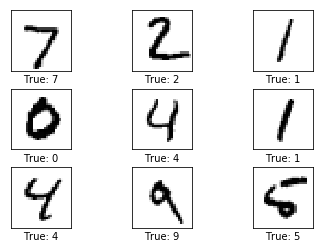

In [8]:
# Get the first images from the test-set.
images = data.test.images[0:9]

# Get the true classes for those images.
cls_true = data.test.cls[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)

Ahora definimos las funciones que nos permitiran crear las variables para el modelo en el formato correcto para ser uasado por TensorFlow e inicializarlas con valores aleatorios. Tenga en cuenta que la inicialización no se realiza en este momento, simplemente se definen las variables para el grafo.

In [9]:
def new_weights(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.05))

def new_biases(length):
    return tf.Variable(tf.constant(0.05, shape=[length]))

# Función para crear una nueva capa Convolutional

Vamos a ecribir una función que nos permita crea una nueva capa convolucional en el grafo computacional para TensorFlow.

Se supone que la entrada es un tensor de 4 dim con las siguientes dimensiones:

 * Número de imagen.
 * Eje Y de cada imagen.
 * Eje X de cada imagen.
 * Canales de cada imagen.

Tenga en cuenta que los canales de entrada pueden ser canales de color, o pueden ser canales de filtro si la entrada se produce a partir de una capa convolucional anterior.

La salida es otro tensor de 4-dim. Con las siguientes dimensiones:

  * Número de imagen, igual que la entrada.
  * Eje Y de cada imagen. Si se usa la agrupación 2x2, la altura y el ancho de las imágenes de entrada se dividen entre 2.
  * Eje X de cada imagen. Ídem.
  * Canales producidos por los filtros convolucionales.
  
definimos la función:

In [10]:
def new_conv_layer(input,              # The previous layer.
                   num_input_channels, # Num. channels in prev. layer.
                   filter_size,        # Width and height of each filter.
                   num_filters,        # Number of filters.
                   use_pooling=True):  # Use 2x2 max-pooling.

    # Shape of the filter-weights for the convolution.
    # This format is determined by the TensorFlow API.
    shape = [filter_size, filter_size, num_input_channels, num_filters]

    # Create new weights aka. filters with the given shape.
    weights = new_weights(shape=shape)

    # Create new biases, one for each filter.
    biases = new_biases(length=num_filters)

    # Create the TensorFlow operation for convolution.
    # Note the strides are set to 1 in all dimensions.
    # The first and last stride must always be 1,
    # because the first is for the image-number and
    # the last is for the input-channel.
    # But e.g. strides=[1, 2, 2, 1] would mean that the filter
    # is moved 2 pixels across the x- and y-axis of the image.
    # The padding is set to 'SAME' which means the input image
    # is padded with zeroes so the size of the output is the same.
    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    # Add the biases to the results of the convolution.
    # A bias-value is added to each filter-channel.
    layer += biases

    # Use pooling to down-sample the image resolution?
    if use_pooling:
        # This is 2x2 max-pooling, which means that we
        # consider 2x2 windows and select the largest value
        # in each window. Then we move 2 pixels to the next window.
        layer = tf.nn.max_pool(value=layer,
                               ksize=[1, 2, 2, 1],
                               strides=[1, 2, 2, 1],
                               padding='SAME')

    # Rectified Linear Unit (ReLU).
    # It calculates max(x, 0) for each input pixel x.
    # This adds some non-linearity to the formula and allows us
    # to learn more complicated functions.
    layer = tf.nn.relu(layer)

    # Note that ReLU is normally executed before the pooling,
    # but since relu(max_pool(x)) == max_pool(relu(x)) we can
    # save 75% of the relu-operations by max-pooling first.

    # We return both the resulting layer and the filter-weights
    # because we will plot the weights later.
    return layer, weights

# Reducción de dimensionalidad de las capas convolucionales

Una capa convolucional produce un tensor de salida con 4 dimensiones. ya que hemos de agregar capas de neuronas completamente conectadas después de las capas de convolución, debemos reducir la dimensionalidad del tensor de 4-dimensional a 2-dimensional, para que puede usarse como entrada a la capa totalmente conectada.

Creamos la función *flatten_layer()*

In [11]:
def flatten_layer(layer):
    # Get the shape of the input layer.
    layer_shape = layer.get_shape()

    # The shape of the input layer is assumed to be:
    # layer_shape == [num_images, img_height, img_width, num_channels]

    # The number of features is: img_height * img_width * num_channels
    # We can use a function from TensorFlow to calculate this.
    num_features = layer_shape[1:4].num_elements()
    
    # Reshape the layer to [num_images, num_features].
    # Note that we just set the size of the second dimension
    # to num_features and the size of the first dimension to -1
    # which means the size in that dimension is calculated
    # so the total size of the tensor is unchanged from the reshaping.
    layer_flat = tf.reshape(layer, [-1, num_features])

    # The shape of the flattened layer is now:
    # [num_images, img_height * img_width * num_channels]

    # Return both the flattened layer and the number of features.
    return layer_flat, num_features

# Función para crear una nueva capa completamente conectada

Esta función crea una nueva capa completamente conectada en el gráfo para TensorFlow. 
Se supone que la entrada es un tensor de forma 2-dim **[shape_image, num_inputs]**. La salida es un tensor de forma 2-dim. **[Num_images, num_outputs].**

In [12]:
def new_fc_layer(input,          # The previous layer.
                 num_inputs,     # Num. inputs from prev. layer.
                 num_outputs,    # Num. outputs.
                 use_relu=True): # Use Rectified Linear Unit (ReLU)?

    # Create new weights and biases.
    weights = new_weights(shape=[num_inputs, num_outputs])
    biases = new_biases(length=num_outputs)

    # Calculate the layer as the matrix multiplication of
    # the input and weights, and then add the bias-values.
    layer = tf.matmul(input, weights) + biases

    # Use ReLU?
    if use_relu:
        layer = tf.nn.relu(layer)

    return layer

# Las variables de marcador de posición (Placeholder variables)

Creamos las variables de marcador de posición comno hicimos en el [Tutorial I]

In [13]:
x = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='x')
x_image = tf.reshape(x, [-1, img_size, img_size, num_channels])
y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')
y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')
y_true_cls = tf.argmax(y_true, dimension=1)


# Capa convolucional 1

Crea la primera capa convolucional. Toma **x_image** como entrada y crea **num_filters1** filtros diferentes, cada uno con ancho y alto igual a **filter_size1**. Finalmente, deseamos reducir el tamaño de la imagen de modo que sea la mitad del tamaño usando **2x2 max-pooling**.

In [14]:
layer_conv1, weights_conv1 = \
    new_conv_layer(input=x_image,
                   num_input_channels=num_channels,
                   filter_size=filter_size1,
                   num_filters=num_filters1,
                   use_pooling=True)

Verificamos la forma del tensor que saldrá por la capa convolucional. Debe ser (?, 14, 14, 16) lo que significa que hay un número arbitrario de imágenes (?), Cada imagen tiene 14 píxeles de ancho y 14 píxeles de alto, y hay 16 canales diferentes, un canal para cada de los filtros

In [15]:
print(layer_conv1)

Tensor("Relu:0", shape=(?, 14, 14, 16), dtype=float32)


# Convolucional Layer 2

Cree la segunda capa convolucional, que toma como entrada la salida de la primera capa convolucional. La cantidad de channel de entrada


In [16]:
layer_conv2, weights_conv2 = \
    new_conv_layer(input=layer_conv1,
                   num_input_channels=num_filters1,
                   filter_size=filter_size2,
                   num_filters=num_filters2,
                   use_pooling=True)

In [17]:
print (layer_conv2)

Tensor("Relu_1:0", shape=(?, 7, 7, 36), dtype=float32)


# Aplanar capa (Flatten Layer)

Las capas convolucionales sacan tensores de 4 niveles. Ahora deseamos utilizarlos como entrada en una red totalmente conectada, lo que requiere que los tensores se reformen o se aplanen en tensores de 2-dim.

In [18]:
layer_flat, num_features = flatten_layer(layer_conv2)

Verificamos que los tensores ahora tengan la forma (?, 1764), lo que significa que hay un número arbitrario de imágenes que se han aplanado en vectores de longitud 1764 cada uno. Tenga en cuenta que 1764 = 7 x 7 x 36.

In [19]:
print(layer_flat)

Tensor("Reshape_1:0", shape=(?, 1764), dtype=float32)


In [20]:
num_features

1764

# Capa 1 completamente conectada

Agregue una capa completamente conectada a la red. La entrada es la capa aplanada de la convolución anterior. La cantidad de neuronas o nodos en la capa completamente conectada es fc_size. ReLU se usa para que podamos aprender relaciones no lineales.

In [21]:
layer_fc1 = new_fc_layer(input=layer_flat,
                         num_inputs=num_features,
                         num_outputs=fc_size,
                         use_relu=True)

Verifique que la salida de la capa completamente conectada sea un tensor con forma (?, 128) donde el (?) significa que hay un número arbitrario de imágenes y fc_size == 128.

In [22]:
print(layer_fc1)

Tensor("Relu_2:0", shape=(?, 128), dtype=float32)


# Capa 2 completamente conectada

Agregue otra capa completamente conectada que produzca vectores de longitud 10 para determinar a cuál de las 10 clases pertenece la imagen de entrada. Tenga en cuenta que ReLU no se usa en esta capa

In [23]:
layer_fc2 = new_fc_layer(input=layer_fc1,
                         num_inputs=fc_size,
                         num_outputs=num_classes,
                         use_relu=False)

In [24]:
print(layer_fc2)

Tensor("add_3:0", shape=(?, 10), dtype=float32)


# Predicción de la Clase (Predicted Class)

La segunda capa totalmente conectada estima qué tan probable es que la imagen de entrada pertenezca a cada una de las 10 clases. Sin embargo, estas estimaciones son un poco difíciles y difíciles de interpretar porque los números pueden ser muy pequeños o grandes, por lo que queremos normalizarlos para que cada elemento esté limitado entre cero y uno y los 10 elementos sumen a uno. Esto se calcula utilizando la función llamada softmax y el resultado se almacena en y_pred.

In [25]:
y_pred = tf.nn.softmax(layer_fc2)

El número de clase es el índice del elemento más grande.

In [26]:
y_pred_cls = tf.argmax(y_pred, dimension=1)

# Función de costo a optimizar

Para mejorar el modelo al clasificar las imágenes de entrada, de alguna manera debemos cambiar las variables para todas las capas de red. Para hacer esto, primero necesitamos saber qué tan bien funciona actualmente el modelo al comparar el resultado predicho del modelo y_pred con el resultado deseado y_true.

La entropía cruzada es una medida de rendimiento utilizada en la clasificación. La entropía cruzada es una función continua que siempre es positiva y si la salida predicha del modelo coincide exactamente con la salida deseada, entonces la entropía cruzada es igual a cero. El objetivo de la optimización es, por lo tanto, minimizar la entropía cruzada para que se acerque lo más posible a cero cambiando las variables de las capas de red.

TensorFlow tiene una función incorporada para calcular la entropía cruzada. Tenga en cuenta que la función calcula el softmax internamente, por lo que debemos usar la salida de layer_fc2 directamente en lugar de y_pred que ya ha aplicado el softmax.

In [27]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=layer_fc2,labels=y_true)

Ahora hemos calculado la entropía cruzada para cada una de las clasificaciones de imágenes, por lo que tenemos una medida de qué tan bien se comporta el modelo en cada imagen individualmente. Pero para usar la entropía cruzada para guiar la optimización de las variables del modelo, necesitamos un solo valor escalar, así que simplemente tomamos el promedio de la entropía cruzada para todas las clasificaciones de imágenes.

In [28]:
cost = tf.reduce_mean(cross_entropy)

# Método de optimización

Ahora que tenemos una medida de costo que debe minimizarse, podemos crear un optimizador. En este caso, es AdamOptimizer, que es una forma avanzada de Gradient Descent.

Tenga en cuenta que la optimización no se realiza en este momento. De hecho, nada se calcula en absoluto, simplemente agregamos el objeto optimizador al grafo TensorFlow para su posterior ejecución.

In [29]:
optimizer = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(cost)

# Medidas de desempeño (Performace Measures)

Necesitamos algunas medidas de rendimiento más para mostrar el progreso al usuario.

Este es un vector de booleanos si la clase predicha es igual a la clase verdadera de cada imagen.

In [30]:
correct_prediction = tf.equal(y_pred_cls, y_true_cls)

Esto calcula la precisión de la clasificación al lanzar por primera vez el vector de booleanos a flotadores, de modo que False se convierte en 0 y True se convierte en 1, y luego calcula el promedio de estos números.

In [31]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# TensorFlow Run

Crear sesión de TensorFlow

Una vez que se ha creado el grafo de TensorFlow, tenemos que crear una sesión de TensorFlow que se utiliza para ejecutar el gráfico.

In [32]:
session = tf.Session()

# Inicializar variables

Las variables para pesos y sesgos deben inicializarse antes de comenzar a optimizarlas.

In [33]:
session.run(tf.global_variables_initializer())

# Helper-function para realizar iteraciones de optimización

Hay 55,000 imágenes en el conjunto de entrenamiento. Lleva mucho tiempo calcular el gradiente del modelo usando todas estas imágenes. Por lo tanto, solo usamos un pequeño lote de imágenes en cada iteración del optimizador.

Si su computadora se cuelga o se vuelve muy lenta debido a que se le acaba la memoria RAM, entonces puede intentar bajar este número, pero puede que tenga que realizar más iteraciones de optimización.

In [34]:
train_batch_size = 64

Función para realizar varias iteraciones de optimización para mejorar gradualmente las variables de las capas de red. En cada iteración, se selecciona un nuevo lote de datos del conjunto de entrenamiento y luego TensorFlow ejecuta el optimizador utilizando esas muestras de entrenamiento. El progreso se imprime cada 100 iteraciones.

In [35]:
# Counter for total number of iterations performed so far.
total_iterations = 0

def optimize(num_iterations):
    # Ensure we update the global variable rather than a local copy.
    global total_iterations

    # Start-time used for printing time-usage below.
    start_time = time.time()

    for i in range(total_iterations,
                   total_iterations + num_iterations):

        # Get a batch of training examples.
        # x_batch now holds a batch of images and
        # y_true_batch are the true labels for those images.
        x_batch, y_true_batch = data.train.next_batch(train_batch_size)

        # Put the batch into a dict with the proper names
        # for placeholder variables in the TensorFlow graph.
        feed_dict_train = {x: x_batch,
                           y_true: y_true_batch}

        # Run the optimizer using this batch of training data.
        # TensorFlow assigns the variables in feed_dict_train
        # to the placeholder variables and then runs the optimizer.
        session.run(optimizer, feed_dict=feed_dict_train)

        # Print status every 100 iterations.
        if i % 100 == 0:
            # Calculate the accuracy on the training-set.
            acc = session.run(accuracy, feed_dict=feed_dict_train)

            # Message for printing.
            msg = "Optimization Iteration: {0:>6}, Training Accuracy: {1:>6.1%}"

            # Print it.
            print(msg.format(i + 1, acc))

    # Update the total number of iterations performed.
    total_iterations += num_iterations

    # Ending time.
    end_time = time.time()

    # Difference between start and end-times.
    time_dif = end_time - start_time

    # Print the time-usage.
    print("Time usage: " + str(timedelta(seconds=int(round(time_dif)))))


# Helper-function to plot example errors

Function for plotting examples of images from the test-set that have been mis-classified.


In [36]:
def plot_example_errors(cls_pred, correct):
    # This function is called from print_test_accuracy() below.

    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # correct is a boolean array whether the predicted class
    # is equal to the true class for each image in the test-set.

    # Negate the boolean array.
    incorrect = (correct == False)
    
    # Get the images from the test-set that have been
    # incorrectly classified.
    images = data.test.images[incorrect]
    
    # Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]

    # Get the true classes for those images.
    cls_true = data.test.cls[incorrect]
    
    # Plot the first 9 images.
    plot_images(images=images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])

Helper-function to plot confusion matrix

In [37]:
def plot_confusion_matrix(cls_pred):
    # This is called from print_test_accuracy() below.

    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # Get the true classifications for the test-set.
    cls_true = data.test.cls
    
    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(y_true=cls_true,
                          y_pred=cls_pred)

    # Print the confusion matrix as text.
    print(cm)

    # Plot the confusion matrix as an image.
    plt.matshow(cm)

    # Make various adjustments to the plot.
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')

    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

# Helper-function para mostrar el rendimiento

Función para imprimir la precisión de clasificación en el conjunto de prueba.

Se tarda un tiempo en calcular la clasificación de todas las imágenes en el conjunto de pruebas, por lo que los resultados se vuelven a utilizar llamando a las funciones anteriores directamente desde esta función, por lo que las clasificaciones no tienen que ser recalculadas por cada función.

Tenga en cuenta que esta función puede usar una gran cantidad de memoria de computadora, por lo que el conjunto de pruebas se divide en lotes más pequeños. Si tiene poco RAM en su computadora y se cuelga, puede probar y reducir el tamaño de lote.

In [38]:
# Split the test-set into smaller batches of this size.
test_batch_size = 256

def print_test_accuracy(show_example_errors=False,
                        show_confusion_matrix=False):

    # Number of images in the test-set.
    num_test = len(data.test.images)

    # Allocate an array for the predicted classes which
    # will be calculated in batches and filled into this array.
    cls_pred = np.zeros(shape=num_test, dtype=np.int)

    # Now calculate the predicted classes for the batches.
    # We will just iterate through all the batches.
    # There might be a more clever and Pythonic way of doing this.

    # The starting index for the next batch is denoted i.
    i = 0

    while i < num_test:
        # The ending index for the next batch is denoted j.
        j = min(i + test_batch_size, num_test)

        # Get the images from the test-set between index i and j.
        images = data.test.images[i:j, :]

        # Get the associated labels.
        labels = data.test.labels[i:j, :]

        # Create a feed-dict with these images and labels.
        feed_dict = {x: images,
                     y_true: labels}

        # Calculate the predicted class using TensorFlow.
        cls_pred[i:j] = session.run(y_pred_cls, feed_dict=feed_dict)

        # Set the start-index for the next batch to the
        # end-index of the current batch.
        i = j

    # Convenience variable for the true class-numbers of the test-set.
    cls_true = data.test.cls

    # Create a boolean array whether each image is correctly classified.
    correct = (cls_true == cls_pred)

    # Calculate the number of correctly classified images.
    # When summing a boolean array, False means 0 and True means 1.
    correct_sum = correct.sum()

    # Classification accuracy is the number of correctly classified
    # images divided by the total number of images in the test-set.
    acc = float(correct_sum) / num_test

    # Print the accuracy.
    msg = "Accuracy on Test-Set: {0:.1%} ({1} / {2})"
    print(msg.format(acc, correct_sum, num_test))

    # Plot some examples of mis-classifications, if desired.
    if show_example_errors:
        print("Example errors:")
        plot_example_errors(cls_pred=cls_pred, correct=correct)

    # Plot the confusion matrix, if desired.
    if show_confusion_matrix:
        print("Confusion Matrix:")
        plot_confusion_matrix(cls_pred=cls_pred)

# Rendimiento antes de cualquier optimización

La precisión en el conjunto de pruebas es muy baja porque las variables del modelo solo se han inicializado y no se han optimizado, por lo que solo clasifica las imágenes al azar.

In [39]:
print_test_accuracy()

Accuracy on Test-Set: 10.1% (1006 / 10000)


# Rendimiento después de 1 iteración de optimización

La precisión de clasificación no mejora mucho con solo 1 iteración de optimización, ya que la tasa de aprendizaje para el optimizador se establece muy baja.

In [40]:
optimize(num_iterations=1)

Optimization Iteration:      1, Training Accuracy:  14.1%
Time usage: 0:00:01


In [41]:
print_test_accuracy()

Accuracy on Test-Set: 9.8% (981 / 10000)


Rendimiento después de 100 iteraciones de optimización¶

Después de 100 iteraciones de optimización, el modelo ha mejorado significativamente su precisión de clasificación.

In [42]:
optimize(num_iterations=100) # We already performed 1 iteration above.

Optimization Iteration:    101, Training Accuracy:  68.8%
Time usage: 0:00:11


In [43]:
print_test_accuracy()

Accuracy on Test-Set: 61.9% (6191 / 10000)


# Rendimiento después de 1000 iteraciones de optimización

Después de 1000 iteraciones de optimización, el modelo ha incrementado enormemente su precisión en el conjunto de pruebas a más del 90%

In [44]:
optimize(num_iterations=900) # We performed 100 iterations above.

Optimization Iteration:    201, Training Accuracy:  73.4%
Optimization Iteration:    301, Training Accuracy:  75.0%
Optimization Iteration:    401, Training Accuracy:  84.4%
Optimization Iteration:    501, Training Accuracy:  87.5%
Optimization Iteration:    601, Training Accuracy:  96.9%
Optimization Iteration:    701, Training Accuracy:  92.2%
Optimization Iteration:    801, Training Accuracy:  90.6%
Optimization Iteration:    901, Training Accuracy:  90.6%
Optimization Iteration:   1001, Training Accuracy:  90.6%
Time usage: 0:01:46


In [45]:
print_test_accuracy(show_example_errors=False)

Accuracy on Test-Set: 93.6% (9363 / 10000)


# Rendimiento después de 10,000 iteraciones de optimización

Después de 10,000 iteraciones de optimización, el modelo tiene una precisión de clasificación en el conjunto de prueba de aproximadamente el 99%.

In [46]:
optimize(num_iterations=9000) # We performed 1000 iterations above.

Optimization Iteration:   1101, Training Accuracy:  92.2%
Optimization Iteration:   1201, Training Accuracy:  89.1%
Optimization Iteration:   1301, Training Accuracy:  92.2%
Optimization Iteration:   1401, Training Accuracy:  92.2%
Optimization Iteration:   1501, Training Accuracy:  92.2%
Optimization Iteration:   1601, Training Accuracy:  96.9%
Optimization Iteration:   1701, Training Accuracy:  98.4%
Optimization Iteration:   1801, Training Accuracy:  92.2%
Optimization Iteration:   1901, Training Accuracy:  98.4%
Optimization Iteration:   2001, Training Accuracy:  93.8%
Optimization Iteration:   2101, Training Accuracy:  98.4%
Optimization Iteration:   2201, Training Accuracy:  98.4%
Optimization Iteration:   2301, Training Accuracy:  87.5%
Optimization Iteration:   2401, Training Accuracy:  96.9%
Optimization Iteration:   2501, Training Accuracy:  96.9%
Optimization Iteration:   2601, Training Accuracy:  96.9%
Optimization Iteration:   2701, Training Accuracy:  98.4%
Optimization I

Accuracy on Test-Set: 98.9% (9893 / 10000)
Confusion Matrix:
[[ 970    0    3    0    0    1    2    1    3    0]
 [   0 1134    1    0    0    0    0    0    0    0]
 [   0    4 1022    0    0    0    0    4    2    0]
 [   0    0    2 1004    0    1    0    0    3    0]
 [   0    0    1    0  974    0    0    3    0    4]
 [   1    1    0    7    0  881    1    0    1    0]
 [   0    3    0    1    1    3  950    0    0    0]
 [   0    1    4    1    0    0    0 1021    1    0]
 [   3    1    5    3    1    1    0    2  956    2]
 [   1    6    0    5    5    6    0    4    1  981]]


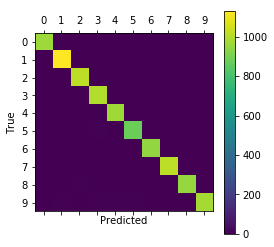

In [47]:
print_test_accuracy(show_confusion_matrix=True)

# Visualización de pesos y capas

Al tratar de entender por qué la red neuronal convolucional puede reconocer los dígitos escritos a mano, ahora vamos a visualizar los pesos de los filtros convolucionales y las imágenes de salida resultantes.

# Helper-function para trazar pesas convolucional

In [48]:
def plot_conv_weights(weights, input_channel=0):
    # Assume weights are TensorFlow ops for 4-dim variables
    # e.g. weights_conv1 or weights_conv2.
    
    # Retrieve the values of the weight-variables from TensorFlow.
    # A feed-dict is not necessary because nothing is calculated.
    w = session.run(weights)

    # Get the lowest and highest values for the weights.
    # This is used to correct the colour intensity across
    # the images so they can be compared with each other.
    w_min = np.min(w)
    w_max = np.max(w)

    # Number of filters used in the conv. layer.
    num_filters = w.shape[3]

    # Number of grids to plot.
    # Rounded-up, square-root of the number of filters.
    num_grids = math.ceil(math.sqrt(num_filters))
    
    # Create figure with a grid of sub-plots.
    fig, axes = plt.subplots(num_grids, num_grids)

    # Plot all the filter-weights.
    for i, ax in enumerate(axes.flat):
        # Only plot the valid filter-weights.
        if i<num_filters:
            # Get the weights for the i'th filter of the input channel.
            # See new_conv_layer() for details on the format
            # of this 4-dim tensor.
            img = w[:, :, input_channel, i]

            # Plot image.
            ax.imshow(img, vmin=w_min, vmax=w_max,
                      interpolation='nearest', cmap='seismic')
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

# Helper-function for plotting the output of a convolutional layer

In [49]:
def plot_conv_layer(layer, image):
    # Assume layer is a TensorFlow op that outputs a 4-dim tensor
    # which is the output of a convolutional layer,
    # e.g. layer_conv1 or layer_conv2.

    # Create a feed-dict containing just one image.
    # Note that we don't need to feed y_true because it is
    # not used in this calculation.
    feed_dict = {x: [image]}

    # Calculate and retrieve the output values of the layer
    # when inputting that image.
    values = session.run(layer, feed_dict=feed_dict)

    # Number of filters used in the conv. layer.
    num_filters = values.shape[3]

    # Number of grids to plot.
    # Rounded-up, square-root of the number of filters.
    num_grids = math.ceil(math.sqrt(num_filters))
    
    # Create figure with a grid of sub-plots.
    fig, axes = plt.subplots(num_grids, num_grids)

    # Plot the output images of all the filters.
    for i, ax in enumerate(axes.flat):
        # Only plot the images for valid filters.
        if i<num_filters:
            # Get the output image of using the i'th filter.
            # See new_conv_layer() for details on the format
            # of this 4-dim tensor.
            img = values[0, :, :, i]

            # Plot image.
            ax.imshow(img, interpolation='nearest', cmap='binary')
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

# Imágenes de entrada

Helper-function para trazar una imagen.

In [50]:
def plot_image(image):
    plt.imshow(image.reshape(img_shape),
               interpolation='nearest',
               cmap='binary')

    plt.show()

Grafique una imagen del conjunto de pruebas que se utilizará como un ejemplo a continuación.

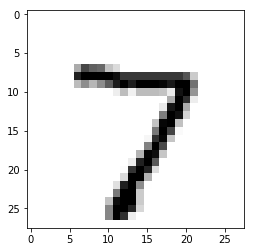

In [51]:
image1 = data.test.images[0]
plot_image(image1)

Grabe otra imagen de ejemplo del conjunto de pruebas.

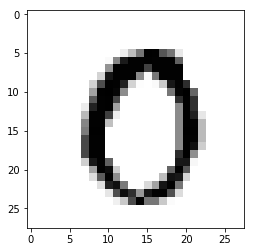

In [52]:
image2 = data.test.images[13]
plot_image(image2)

# Convolutional Layer 1

Ahora trace los pesos de filtro para la primera capa convolucional.

Tenga en cuenta que los pesos positivos son rojos y los negativos son azules.

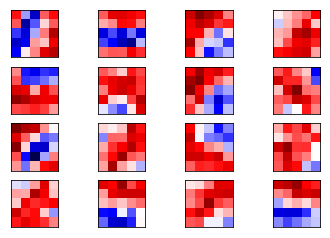

In [53]:
plot_conv_weights(weights=weights_conv1)

Al aplicar cada uno de estos filtros convolutivos a la primera imagen de entrada se obtienen las siguientes imágenes de salida, que luego se utilizan como entrada a la segunda capa convolucional. Tenga en cuenta que estas imágenes se muestrean a 14 x 14 píxeles, que es la mitad de la resolución de la imagen de entrada original.

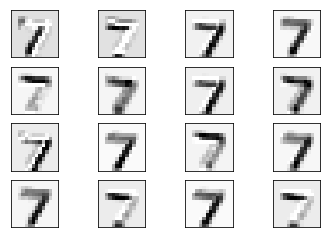

In [54]:
plot_conv_layer(layer=layer_conv1, image=image1)

Las siguientes imágenes son los resultados de la aplicación de los filtros convolucionales a la segunda imagen.

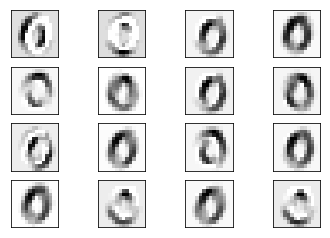

In [55]:
plot_conv_layer(layer=layer_conv1, image=image2)

Es difícil ver a partir de estas imágenes cuál podría ser el propósito de los filtros convolucionales. Parece que simplemente han creado varias variaciones de la imagen de entrada, como si la luz brillara desde diferentes ángulos y proyectara sombras en la imagen.

# Convolución Capa 2

Ahora trace los pesos de filtro para la segunda capa convolucional.

Hay 16 canales de salida de la primera conv-layer, lo que significa que hay 16 canales de entrada para la segunda conv-layer. La segunda conv-layer tiene un conjunto de pesos de filtro para cada uno de sus canales de entrada. Comenzamos trazando los pesos del filtro para el primer canal.

Observe nuevamente que los pesos positivos son rojos y los pesos negativos son azules.

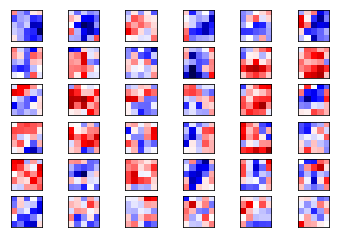

In [56]:
plot_conv_weights(weights=weights_conv2, input_channel=1)

Hay 16 canales de entrada a la segunda capa convolucional, por lo que podemos hacer otras 15 gráficas de este tipo. Simplemente hacemos uno más con los pesos de filtro para el segundo canal.

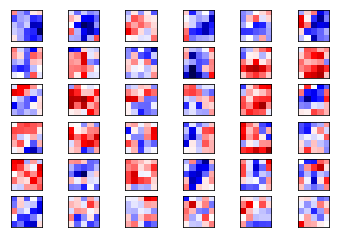

In [57]:
plot_conv_weights(weights=weights_conv2, input_channel=1)

Puede ser difícil de entender y hacer un seguimiento de cómo se aplican estos filtros debido a la alta dimensionalidad.

La aplicación de estos filtros convolucionales a las imágenes que se obtuvieron a partir de la primera conv-layer proporciona las siguientes imágenes.

Tenga en cuenta que estos se vuelven a muestrear una vez más a 7 x 7 píxeles que es la mitad de la resolución de las imágenes de la primera conv-layer.

plot_conv_layer(layer=layer_conv2, image=image1)

Y estos son los resultados de aplicar los pesos de filtro a la segunda imagen.

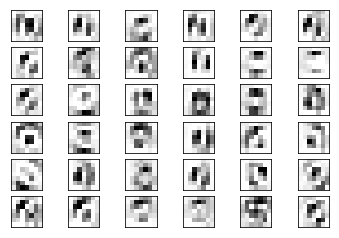

In [58]:
plot_conv_layer(layer=layer_conv2, image=image2)

De estas imágenes, parece que la segunda capa convolucional puede detectar líneas y patrones en las imágenes de entrada, que son menos sensibles a las variaciones locales en las imágenes de entrada originales.

Estas imágenes se aplanan y se introducen en la capa totalmente conectada, pero eso no se muestra aquí.


# Close TensorFlow Session

We are now done using TensorFlow, so we close the session to release its resources.


In [59]:
# This has been commented out in case you want to modify and experiment
# with the Notebook without having to restart it.
# session.close()



# Conclusión

Hemos visto que una Red Neural Convolucional funciona mucho mejor al reconocer los dígitos escritos a mano que el modelo lineal simple en el Tutorial # 01. La red Convolutional obtiene una precisión de clasificación de aproximadamente el 99%, o incluso más si realiza algunos ajustes, en comparación con solo el 91% para el modelo lineal simple.

Sin embargo, la Red convolucional también es mucho más complicada de implementar, y no es obvio mirar los pesos de filtro por qué funciona y por qué a veces falla.

Entonces, nos gustaría una forma más fácil de programar redes neuronales convolucional y también nos gustaría una mejor manera de visualizar su funcionamiento interno.



# Exercises

These are a few suggestions for exercises that may help improve your skills with TensorFlow. It is important to get hands-on experience with TensorFlow in order to learn how to use it properly.

You may want to backup this Notebook before making any changes.

* Do you get the exact same results if you run the Notebook multiple times without changing any parameters? What are the sources of randomness?
* Run another 10,000 optimization iterations. Are the results better?
* Change the learning-rate for the optimizer.
* Change the configuration of the layers, such as the number of convolutional filters, the size of those filters, the number of neurons in the fully-connected layer, etc.
* Add a so-called drop-out layer after the fully-connected layer. Note that the drop-out probability should be zero when calculating the classification accuracy, so you will need a placeholder variable for this probability.
* Change the order of ReLU and max-pooling in the convolutional layer. Does it calculate the same thing? What is the fastest way of computing it? How many calculations are saved? Does it also work for Sigmoid-functions and average-pooling?
* Add one or more convolutional and fully-connected layers. Does it help performance?
* What is the smallest possible configuration that still gives good results?
* Try using ReLU in the last fully-connected layer. Does the performance change? Why?
* Try not using pooling in the convolutional layers. Does it change the classification accuracy and training time?
* Try using a 2x2 stride in the convolution instead of max-pooling? What is the difference?
* Remake the program yourself without looking too much at this source-code.
* Explain to a friend how the program works.


Estas son algunas sugerencias para ejercicios que pueden ayudar a mejorar sus habilidades con TensorFlow. Es importante obtener experiencia práctica con TensorFlow para aprender a usarla correctamente.

Es posible que desee hacer una copia de seguridad de este portátil antes de realizar cualquier cambio.

   * ¿Obtiene exactamente los mismos resultados si ejecuta el portátil varias veces sin cambiar ningún parámetro? ¿Cuáles son las fuentes de aleatoriedad?
   
   * Ejecutar otras 10 000 iteraciones de optimización. ¿Son mejores los resultados?
   
   * Cambia la tasa de aprendizaje para el optimizador.
   
   * Cambie la configuración de las capas, como el número de filtros convolucionales, el tamaño de esos filtros, el número de neuronas en la capa totalmente conectada, etc.
   
   * Agregue una capa llamada drop-out después de la capa completamente conectada. Tenga en cuenta que la probabilidad de abandono debería ser cero al calcular la precisión de clasificación, por lo que necesitará una variable de marcador de posición para esta probabilidad.
    
   * Cambia el orden de ReLU y la agrupación máxima en la capa convolucional. ¿Calcula lo mismo? ¿Cuál es la forma más rápida de computarlo? ¿Cuántos cálculos se guardan? ¿También funciona para Sigmoid-functions y pooling promedio?
    
   * Agregue una o más capas convolucionales y totalmente conectadas. ¿Ayuda el rendimiento?
   
   * ¿Cuál es la configuración más pequeña posible que aún da buenos resultados?
    
   * Intente usar ReLU en la última capa completamente conectada. ¿Cambia el rendimiento? ¿Por qué?
    
   * Intente no usar la agrupación en las capas convolucionales. ¿Cambia la precisión de la clasificación y el tiempo de entrenamiento?
    
   * ¿Intenta usar una zancada 2x2 en la convolución en lugar de la agrupación máxima? ¿Cuál es la diferencia?
    
   * Vuelva a programar el programa usted mismo sin mirar demasiado a este código fuente.
      
   * Explique a un amigo cómo funciona el programa.
   
   
   http://cs.stanford.edu/people/karpathy/convnetjs/demo/image_regression.html